In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

C:\Users\strat\ProgramData\Lib\site-packages\huggingface_hub\utils\_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(


In [2]:
# Device configuration
device = torch.device( 'cpu')

# Hyper-parameters 
num_epochs = 5
batch_size = 4
learning_rate = 0.001

# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [3]:
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [4]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


In [5]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

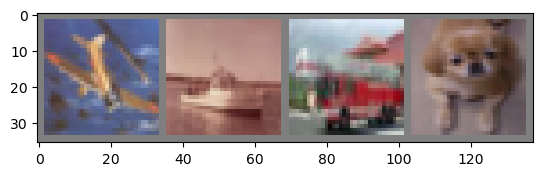

In [6]:
imshow(torchvision.utils.make_grid(images))

In [7]:
images.shape

torch.Size([4, 3, 32, 32])

In [8]:
class CNN_Neural_Network(nn.Module):
    def __init__(self):
        super(CNN_Neural_Network,self).__init__()
        self.model = nn.Sequential(
            # (n, 3,32,32)
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3),  # (N, 64, 30, 30)
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # (N, 64, 15, 15)
            nn.Conv2d(in_channels=64, out_channels=32, kernel_size=3),  # (N, 32, 13, 13)
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(in_features=32*13*13, out_features=120),
            nn.ReLU(),
            nn.Linear(in_features=120, out_features=84),
            nn.ReLU(),
            nn.Linear(84, 10)
            )
    def forward(self,x):
        x = self.model(x)
        return x
            
        

In [9]:
model = CNN_Neural_Network().to(device)
print(model)

CNN_Neural_Network(
  (model): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): Flatten(start_dim=1, end_dim=-1)
    (6): Linear(in_features=5408, out_features=120, bias=True)
    (7): ReLU()
    (8): Linear(in_features=120, out_features=84, bias=True)
    (9): ReLU()
    (10): Linear(in_features=84, out_features=10, bias=True)
  )
)


In [10]:
model = CNN_Neural_Network().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

Epoch [1/5], Step [2000/12500], Loss: 2.3290
Epoch [1/5], Step [4000/12500], Loss: 2.0491
Epoch [1/5], Step [6000/12500], Loss: 2.1195
Epoch [1/5], Step [8000/12500], Loss: 2.0931
Epoch [1/5], Step [10000/12500], Loss: 1.8504
Epoch [1/5], Step [12000/12500], Loss: 2.1750
Epoch [2/5], Step [2000/12500], Loss: 1.9815
Epoch [2/5], Step [4000/12500], Loss: 1.6268
Epoch [2/5], Step [6000/12500], Loss: 1.3372
Epoch [2/5], Step [8000/12500], Loss: 2.1058
Epoch [2/5], Step [10000/12500], Loss: 2.4682
Epoch [2/5], Step [12000/12500], Loss: 1.5742
Epoch [3/5], Step [2000/12500], Loss: 1.3228
Epoch [3/5], Step [4000/12500], Loss: 0.6939
Epoch [3/5], Step [6000/12500], Loss: 1.0085
Epoch [3/5], Step [8000/12500], Loss: 1.5400
Epoch [3/5], Step [10000/12500], Loss: 0.9007
Epoch [3/5], Step [12000/12500], Loss: 1.0841
Epoch [4/5], Step [2000/12500], Loss: 0.9079
Epoch [4/5], Step [4000/12500], Loss: 0.8799
Epoch [4/5], Step [6000/12500], Loss: 0.6500
Epoch [4/5], Step [8000/12500], Loss: 1.2712
Epoc